<a href="https://colab.research.google.com/github/uzhegovaelena/ecommerce_analysis/blob/main/e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data
The data includes product metadata, user metadata, and transactional data. The dataset contains over 40 thousand transactions, covering the period from June 30, 2016 to July 31, 2022.


##Research questions


Create a report to answer questions and add plots to visualize findings. Include:

- What are the sales compared to the previous period?
- What are the category sales compared to the previous period?
- What are the total sales for each payment method?
- What is the average unit price for each product line?
- What is the total purchase value by product line?

### Descriptive analysis

#### import packages and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import datetime

In [ ]:
# Mount my Google Drive in the Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os

# path = '/content/drive/My Drive/Turing college/Tasks'
# files = os.listdir(path)
# print(files)

In [ ]:
# Navigate to the directory where the Excel file is located
customer = pd.read_csv('/content/drive/My Drive/Turing college/Tasks/Capstone project/customer_test.csv')
customer.sample(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
2022,102961,Lanjar,Pangestu,6c148b70-1f43-402f-a61d-89a827339cdc,6c148b70_1f43_402f_a61d_89a827339cdc@zakyfound...,NaN,2007-02-03,Android,e85e9b8c-364e-4b2d-97af-bd89a8b4db5c,Android 3.2.5,-7.670279,110.329005,Yogyakarta,Indonesia,2022-02-26
364,101534,Liman,Waskita,14f1d742-d95b-44d2-a624-70a2e4069d86,14f1d742_d95b_44d2_a624_70a2e4069d86@startupca...,NaN,1995-02-28,Android,afb66d48-5223-4e75-9b08-d20bccac728c,Android 2.3.1,-6.138556,106.825678,Jakarta Raya,Indonesia,2019-06-01


In [ ]:
product = pd.read_csv('/content/drive/My Drive/Turing college/Tasks/Capstone project/new_product.csv')
product.sample(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
21662,6400,Men,Footwear,Sandal,Sandals,Black,Summer,2011.0,Casual,Lotto Men Laos Black Grey Floater
14452,41753,Boys,Apparel,Topwear,Tshirts,Red,Summer,2012.0,Casual,Doodle Boys Printed Red T-shirt


In [ ]:
transactions = pd.read_csv('/content/drive/My Drive/Turing college/Tasks/Capstone project/transactions_test.csv')
transactions.sample(2)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
8513,2020-11-14T15:40:55.332700Z,102402,53dd8042-d230-4cd1-bb16-c3537cbabdcb,8969ba6e-e696-48f1-93f4-d93e14e180b6,"[{'product_id': 56485, 'quantity': 1, 'item_pr...",Gopay,Success,0,NaN,0.0,2020-11-16T07:55:56.787628Z,-7.679682,110.417996,NaN
38438,2020-02-02T20:20:27.422031Z,101444,a426c0eb-5fd9-482d-8f92-66246f8636d7,dc71bdbc-4c53-45ed-a83d-c785cbca0f0f,"[{'product_id': 36492, 'quantity': 1, 'item_pr...",Credit Card,Success,6121,WEEKENDSERU,10000.0,2020-02-06T13:08:45.524923Z,1.549803,109.330378,NaN


#### transform data

In [ ]:

#the ast.literal_eval() function to safely evaluate the string representation of the list and convert it into an actual list of dictionaries.
transactions['product_metadata'] = transactions['product_metadata'].apply(ast.literal_eval)

# Explode the 'product_metadata' column to create new rows
transactions = transactions.explode('product_metadata')

# Extract values into new columns
transactions['product_id'] = transactions['product_metadata'].apply(lambda x: x['product_id'])
transactions['quantity'] = transactions['product_metadata'].apply(lambda x: x['quantity'])

# transactions['item_price'] = transactions['product_metadata'].apply(lambda x: x['item_price'])

def get_product_id(metadata):
    return metadata['item_price']

transactions['item_price'] = transactions['product_metadata'].apply(get_product_id)

transactions.drop('product_metadata', axis=1, inplace=True)

In [ ]:
idr_to_usd = 0.000067
transactions['item_price_usd'] = transactions.item_price*idr_to_usd
transactions['total_sales_usd'] = transactions['quantity']*transactions['item_price_usd']
transactions['total_amount_usd'] = transactions['total_amount']*idr_to_usd


transactions.head(1)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd
0,2017-02-01T23:06:50.716201Z,104555,97df3fe2-3efc-429a-aff6-ccecf5306c31,90acade1-9dbb-464b-82a9-f9332625d225,NaN,Success,3443,BUYMORE,0.0,2017-02-06T19:36:48.649046Z,-5.473218,105.608432,758102.0,55170,1,246915,16.543305,16.543305,50.792834


In [ ]:
#check right total_sales_usd calculation
filtered_rows = transactions[transactions['booking_id'] == '97df3fe2-3efc-429a-aff6-ccecf5306c31']
print(filtered_rows)

                    created_at  customer_id  \
0  2017-02-01T23:06:50.716201Z       104555   
0  2017-02-01T23:06:50.716201Z       104555   
0  2017-02-01T23:06:50.716201Z       104555   

                             booking_id                            session_id  \
0  97df3fe2-3efc-429a-aff6-ccecf5306c31  90acade1-9dbb-464b-82a9-f9332625d225   
0  97df3fe2-3efc-429a-aff6-ccecf5306c31  90acade1-9dbb-464b-82a9-f9332625d225   
0  97df3fe2-3efc-429a-aff6-ccecf5306c31  90acade1-9dbb-464b-82a9-f9332625d225   

  payment_method payment_status  promo_amount promo_code  shipment_fee  \
0            NaN        Success          3443    BUYMORE           0.0   
0            NaN        Success          3443    BUYMORE           0.0   
0            NaN        Success          3443    BUYMORE           0.0   

           shipment_date_limit  shipment_location_lat  shipment_location_long  \
0  2017-02-06T19:36:48.649046Z              -5.473218              105.608432   
0  2017-02-06T19:36:48.6490

In [ ]:
data = pd.merge(customer, transactions, on='customer_id')
data.head(3)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,...,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd
0,102130,Tania,Winarsih,dfa5266c-fcfc-4836-9757-4e6df5740200,dfa5266c_fcfc_4836_9757_4e6df5740200@zakyfound...,F,1998-12-15,Android,e64c3caf-e1b8-4311-b28c-cae99040910a,Android 2.0.1,...,NaN,NaN,NaN,253341.0,9776,1,243341,16.303847,16.303847,16.973847
1,102130,Tania,Winarsih,dfa5266c-fcfc-4836-9757-4e6df5740200,dfa5266c_fcfc_4836_9757_4e6df5740200@zakyfound...,F,1998-12-15,Android,e64c3caf-e1b8-4311-b28c-cae99040910a,Android 2.0.1,...,2021-09-19T00:43:16.592883Z,-8.038432,110.635506,231118.0,6091,1,221118,14.814906,14.814906,15.484906
2,104146,Wulan,Namaga,d74f670f-b9cf-4586-aca5-e11057285126,d74f670f_b9cf_4586_aca5_e11057285126@startupca...,F,2000-10-16,Android,4266d8b3-6820-4124-b8aa-d8fff5bf2646,Android 4.1.2,...,NaN,NaN,NaN,227779.0,48684,1,212779,14.256193,14.256193,15.261193


In [ ]:
product = pd.DataFrame(product)
full_data = pd.merge(product, data, left_on='id', right_on='product_id')
full_data.head(3)


,id,gender_x,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,NaN,NaN,NaN,NaN,15970,1,132122,8.852174,8.852174,NaN
1,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,2021-07-11T13:19:46.952374Z,-5.212964,105.676584,NaN,15970,1,474307,31.778569,31.778569,NaN
2,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,2018-12-06T10:39:28.594161Z,-7.518984,110.451087,NaN,15970,1,478983,32.091861,32.091861,NaN


In [ ]:
full_data['birthdate'] = pd.to_datetime(full_data['birthdate'])
full_data['age'] = datetime.datetime.now().year - full_data['birthdate'].dt.year

#Can use time of transaction instead of to_datetime

# data_new.head(1)


In [ ]:
full_data.rename(columns={'gender_x': 'category_gender', 'gender_y': 'customer_gender'}, inplace=True)


#### Describe data

In [ ]:
full_data.head(1)


,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd,age
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,NaN,NaN,NaN,15970,1,132122,8.852174,8.852174,NaN,30


In [ ]:
full_data.sample(2)


,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd,age
51118,35247,Men,Accessories,Socks,Socks,Red,Summer,2012.0,Casual,Manchester United Men Red Socks,...,NaN,NaN,235518.0,35247,1,225518,15.109706,15.109706,15.779706,34
50897,13543,Women,Footwear,Shoes,Heels,Red,Winter,2012.0,Casual,Carlton London Women Casual Red Flats,...,NaN,NaN,1790471.0,13543,1,181662,12.171354,12.171354,119.961557,23


In [ ]:
full_data.tail(1)


,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd,age
63466,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016.0,Casual,Fossil Women Pink Dial Chronograph Watch ES3050,...,NaN,NaN,903528.0,51623,4,223382,14.966594,59.866376,60.536376,22


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63467 entries, 0 to 63466
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      63467 non-null  int64         
 1   category_gender         63467 non-null  object        
 2   masterCategory          63467 non-null  object        
 3   subCategory             63467 non-null  object        
 4   articleType             63467 non-null  object        
 5   baseColour              63446 non-null  object        
 6   season                  63436 non-null  object        
 7   year                    63467 non-null  float64       
 8   usage                   63000 non-null  object        
 9   productDisplayName      63461 non-null  object        
 10  customer_id             63467 non-null  int64         
 11  first_name              63467 non-null  object        
 12  last_name               63467 non-null  object

In [ ]:
full_data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
id,63467.0,29735.53,17027.63,1164.00,14841.00,28602.00,44677.00,60000.00
year,63467.0,2012.82,2.13,2007.00,2011.00,2012.00,2015.00,2019.00
customer_id,63467.0,102487.34,1464.63,100000.00,101229.00,102443.00,103774.00,105000.00
home_location_lat,46233.0,-5.02,3.24,-10.15,-7.43,-6.25,-3.08,5.47
home_location_long,46233.0,111.36,6.80,95.64,106.86,110.16,113.36,140.84
promo_amount,63467.0,2052.37,3044.71,0.00,0.00,0.00,4043.00,21495.00
shipment_fee,28884.0,9908.08,9373.22,0.00,5000.00,10000.00,10000.00,50000.00
shipment_location_lat,28884.0,-5.12,3.10,-10.86,-7.40,-6.25,-3.13,5.68
shipment_location_long,28884.0,111.09,6.48,95.10,106.87,110.18,113.17,141.00
total_amount,41027.0,1168205.69,1728668.67,8624.00,246279.00,448958.00,1327056.00,13676534.00


In [ ]:
# Check missing values
full_data[:].isnull().sum()

id                            0
category_gender               0
masterCategory                0
subCategory                   0
articleType                   0
baseColour                   21
season                       31
year                          0
usage                       467
productDisplayName            6
customer_id                   0
first_name                    0
last_name                     0
username                      0
email                         0
customer_gender           18220
birthdate                     0
device_type                6514
device_id                     0
device_version             6514
home_location_lat         17234
home_location_long        17234
home_location             17234
home_country              17234
first_join_date               0
created_at                    0
booking_id                    0
session_id                    0
payment_method            22043
payment_status                0
promo_amount                  0
promo_co

### Analysis

In [ ]:
#@title # Filter the data for the desired date ranges
mtd_start_date = '2021-07-31'
mtd_end_date = '2022-07-31'
prev_start_date = '2020-08-01'
prev_end_date = '2021-07-31'

mtd_data = full_data[(full_data['created_at'] >= mtd_start_date) & (full_data['created_at'] <= mtd_end_date)]
prev_data = full_data[(full_data['created_at'] >= prev_start_date) & (full_data['created_at'] <= prev_end_date)]

mtd_data.sample(1)

,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,item_price_usd,total_sales_usd,total_amount_usd,age
42403,15630,Men,Apparel,Topwear,Jackets,Black,Fall,2011.0,Sports,Nike Men AS Thermal Black Jackets,...,-2.670575,101.725521,138732.0,15630,1,130736,8.759312,8.759312,9.295044,27


In [ ]:
#@title Function to create a bar chart and compare two bars
def plot_comparison_bar_chart(dataframe, bar_width_number,length, height,
                              column1, column2,column1_label, column2_label,
                              xlabel, ylabel, title, x_axis):
    # Define the bar width
    bar_width = bar_width_number

    # Set the x-axis positions for the bars
    x_pos = np.arange(len(dataframe))

    # Plotting the bar chart
    plt.figure(figsize=(length, height))
    plt.bar(x_pos, dataframe[column1], width=bar_width, label=column1_label)
    plt.bar(x_pos + bar_width, dataframe[column2],
            width=bar_width, label=column2_label)

    # Adding labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Adding x-axis tick labels
    plt.xticks(x_pos + bar_width / 2, dataframe[x_axis])

    # Adding legend
    plt.legend()

    # Displaying the chart
    plt.show()


In [ ]:
#@title Function to build box plots and distribution
def box_plots(dataframe, x_axis, y_axis, x_label, y_label, title_label):
  fig = px.box(dataframe, x=x_axis, y=y_axis, title = title_label,
             points="all",
             labels={
                 y_axis: x_label,
                 x_axis: y_label
             })
  fig.update_traces(quartilemethod="exclusive")

  fig.show()


In [ ]:
mtd_data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
id,24220.0,29638.07,17031.29,1164.00,14796.25,28473.50,44486.50,60000.00
year,24220.0,2012.81,2.13,2007.00,2011.00,2012.00,2015.00,2019.00
customer_id,24220.0,102508.84,1476.83,100001.00,101229.00,102504.00,103788.00,104999.00
home_location_lat,17363.0,-5.00,3.20,-10.15,-7.35,-6.25,-3.06,5.47
home_location_long,17363.0,111.01,6.41,95.64,106.85,109.99,112.83,140.84
promo_amount,24220.0,1772.18,2920.93,0.00,0.00,0.00,3446.25,21495.00
shipment_fee,10944.0,9944.72,9328.12,0.00,5000.00,10000.00,10000.00,50000.00
shipment_location_lat,10944.0,-5.13,3.07,-10.86,-7.37,-6.25,-3.14,5.28
shipment_location_long,10944.0,110.91,6.33,95.92,106.86,110.09,112.91,141.00
total_amount,15741.0,1224932.88,1786705.72,8624.00,247181.00,456303.00,1410105.00,13508479.00


In [ ]:
#@title Total sales
total_sales = round(full_data.loc[full_data['total_amount'].notna(),'total_sales_usd'].sum(),2)
total_usd_mtd_notna = mtd_data.loc[mtd_data['total_amount'].notna(), 'total_sales_usd'].sum()

print(f'Full period from 2016 to 2022 year: {total_sales}')
print(f'Period from Jul 2021 to Jul 2022: {total_usd_mtd_notna}')

Full period from 2016 to 2022 year: 1012819.62
Period from Jul 2021 to Jul 2022: 386832.8214


In [ ]:
#@title What are the sales compared to the previous period?

total_sales_mtd = mtd_data.loc[mtd_data['total_amount'].notna(),
                               'total_sales_usd'].sum()
total_sales_prev = prev_data.loc[prev_data['total_amount'].notna(),
                                 'total_sales_usd'].sum()

percentage_change = round(
    ((total_sales_mtd - total_sales_prev) / total_sales_prev) * 100, 2)

print(f"Total sales YTD: ${total_sales_mtd}")
print(f"Total sales previous period: ${total_sales_prev}")
print(f"Percentage change: {percentage_change}%")

Total sales YTD: $386832.8214
Total sales previous period: $249404.24741799998
Percentage change: 55.1%


In [ ]:
#@title What are the category sales compared to the previous period?

# Calculate the YTD and previous period total sales for each category
mtd_sales = mtd_data.loc[mtd_data['total_amount'].notna(), 'total_sales_usd']
            .groupby(mtd_data['masterCategory']).sum()
prev_sales = prev_data.loc[prev_data['total_amount'].notna(), 'total_sales_usd']
            .groupby(prev_data['masterCategory']).sum()

# Create a dataframe with the comparison results and merge Dataframes
df_comparison = pd.DataFrame({'masterCategory': mtd_sales.index})
df_comparison = df_comparison.merge(mtd_sales, how='left',
                                    left_on='masterCategory', right_index=True)
df_comparison = df_comparison.merge(prev_sales, how='left',
                                    left_on='masterCategory', right_index=True)
df_comparison = df_comparison.rename(columns={
    'total_sales_usd_x': 'mtd_total_sales',
    'total_sales_usd_y': 'prev_total_sales'
    })

# Fill missing values in prev_total_sales with 0
df_comparison['prev_total_sales'] = df_comparison['prev_total_sales'].fillna(0)

df_comparison['percentage_change'] = round(
    ((df_comparison['mtd_total_sales'] - df_comparison['prev_total_sales']) /
     df_comparison['prev_total_sales']) * 100, 2)

# Replace 'inf' with a specific value (e.g., 0)
df_comparison.replace([np.inf, -np.inf], 0, inplace=True)

df_comparison = df_comparison.sort_values('mtd_total_sales', ascending=False)

df_comparison.head(10)

,masterCategory,mtd_total_sales,prev_total_sales,percentage_change
1,Apparel,184034.274740,122172.558139,50.63
0,Accessories,98388.106534,62464.162377,57.51
2,Footwear,82512.313958,51331.053442,60.75
5,Personal Care,20881.893618,12753.515593,63.73
3,Free Items,764.492177,600.480331,27.31
6,Sporting Goods,241.739551,82.477536,193.10
4,Home,10.000822,0.000000,0.00


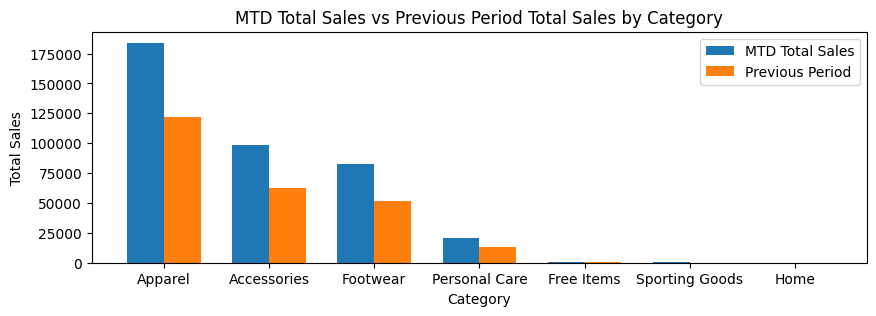

In [ ]:
#@title Visualisation total sales by category
plot_comparison_bar_chart(df_comparison, 0.35,10,3, 'mtd_total_sales',
                          'prev_total_sales', 'MTD Total Sales',
                          'Previous Period', 'Category', 'Total Sales',
                          'MTD Total Sales vs Previous Period Total Sales by Category',
                          'masterCategory')


- Total sales increased YTD compared to the previous period +50.92%
- Top 3 categories: Apparel, Accessories, Footwear
- Total Footwear category sales increased YTD compared to the previous period +88.71%
- Total Accessories category sales increased YTD compared to the previous period +67.56%
- Total Apparel category sales increased YTD compared to the previous period +60.52%


In [ ]:
#@title Distribution of total sales by category
box_plots(mtd_data, "masterCategory", "total_sales_usd", "Category",
          "total sales, usd", 'Distribution of total sales by category')

In [ ]:
#@title Quantity visualisation
box_plots(mtd_data, "masterCategory", "quantity", "Category", "quantity", 'Distribution of quantity by category')

In [ ]:
#@title What are the payment method sales compared to the previous period?

# Calculate the YTD and previous period total sales for each category
mtd_payment = mtd_data.loc[mtd_data['total_amount'].notna(), 'total_sales_usd'].groupby(mtd_data['payment_method']).sum()
prev_payment = prev_data.loc[prev_data['total_amount'].notna(), 'total_sales_usd'].groupby(prev_data['payment_method']).sum()

# Create a dataframe with the comparison results and merge Dataframes
df_comp_pay = pd.DataFrame({'payment_method': mtd_payment.index})
df_comp_pay = df_comp_pay.merge(mtd_payment, how='left', left_on='payment_method', right_index=True)
df_comp_pay = df_comp_pay.merge(prev_payment, how='left', left_on='payment_method', right_index=True)
df_comp_pay = df_comp_pay.rename(columns={'total_sales_usd_x': 'mtd_total_sales', 'total_sales_usd_y': 'prev_total_sales'})

# Fill missing values in prev_total_sales with 0
df_comp_pay['prev_total_sales'] = df_comp_pay['prev_total_sales'].fillna(0)

df_comp_pay['percentage_change'] = round(((df_comp_pay['mtd_total_sales'] - df_comp_pay['prev_total_sales']) / df_comp_pay['prev_total_sales']) * 100, 2)

# Replace 'inf' with a specific value (e.g., 0)
df_comp_pay.replace([np.inf, -np.inf], 0, inplace=True)

df_comp_pay = df_comp_pay.sort_values('mtd_total_sales', ascending=False)

df_comp_pay.head(10)

,payment_method,mtd_total_sales,prev_total_sales,percentage_change
0,Credit Card,90963.526994,58458.946195,55.60
2,Gopay,50785.165917,31346.322252,62.01
4,OVO,49805.532921,35751.380766,39.31
1,Debit Card,41771.995741,23012.888650,81.52
3,LinkAja,18864.384593,11022.160687,71.15


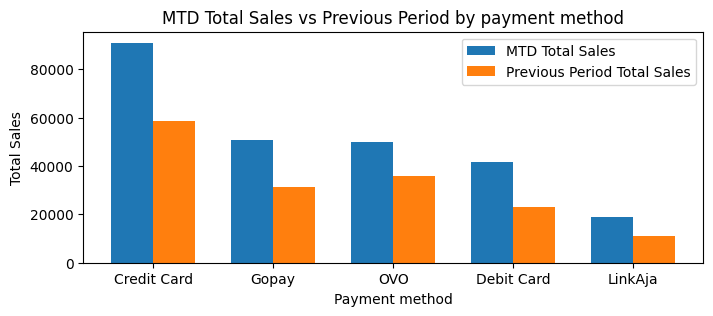

In [ ]:
plot_comparison_bar_chart(df_comp_pay, 0.35, 8, 3, 'mtd_total_sales', 'prev_total_sales', 'MTD Total Sales', 'Previous Period Total Sales', 'Payment method','Total Sales', 'MTD Total Sales vs Previous Period by payment method', 'payment_method')


- The most popular payment methods are Credit Cards and Gopay YTD
- Credit card sales increased YTD compared to the previous period +58.78%
- Gopay sales increased YTD compared to the previous period +81.48%

In [ ]:
#@title What is the average unit price for each product line?

avg_item_price = round(
    mtd_data.groupby('masterCategory')[['item_price_usd']].mean(), 2)

# Reset the index to make 'category' a column
avg_item_price = avg_item_price.reset_index()

avg_item_price

,masterCategory,item_price_usd
0,Accessories,16.65
1,Apparel,16.66
2,Footwear,16.78
3,Free Items,17.18
4,Home,15.83
5,Personal Care,16.48
6,Sporting Goods,16.27


In [ ]:
#@title Price visualisation
box_plots(mtd_data, "masterCategory", "item_price_usd", "Category", "Price", 'Distribution of Price by category')

In [ ]:
#@title Total customers MTD

total_customers_mtd = mtd_data['customer_id'].nunique()
total_customers_prev = prev_data['customer_id'].nunique()

percentage_change = round(((total_customers_mtd - total_customers_prev) / total_customers_prev) * 100,2)

print(f"Total customers MTD: {total_customers_mtd}")
print(f"Total customers previous period: {total_customers_prev}")
print(f"Percentage change: {percentage_change}%")

Total customers MTD: 1949
Total customers previous period: 1659
Percentage change: 17.48%


In [ ]:
print(full_data['age'].dtype)
full_data['age'] = full_data['age'].astype(str)
print(full_data['age'].unique())

int64
['30' '51' '37' '19' '28' '34' '17' '32' '35' '24' '26' '22' '20' '25'
 '27' '33' '18' '31' '29' '14' '39' '23' '21' '16' '40' '36' '12' '44'
 '38' '43' '47' '60' '11' '55' '42' '41' '52' '13' '15' '9' '45' '46' '49'
 '50' '48' '10' '57' '54']


In [ ]:
count_ids = mtd_data[mtd_data['quantity'] > 1].groupby('masterCategory')['id'].count()
count_ids

masterCategory
Accessories       1036
Apparel           1930
Footwear           865
Free Items          10
Personal Care      228
Sporting Goods       2
Name: id, dtype: int64

- The total number of customers increased YTD compared to the previous period +17.24%

In [ ]:
#@title What are the gender sales compared to the previous period?

mtd_gender = mtd_data.loc[mtd_data['total_amount'].notna(), 'total_sales_usd'].groupby(mtd_data['customer_gender']).sum()
prev_gender = prev_data.loc[prev_data['total_amount'].notna(), 'total_sales_usd'].groupby(prev_data['customer_gender']).sum()

# Create a dataframe with the comparison results and merge Dataframes
df_comp_gender = pd.DataFrame({'customer_gender': mtd_gender.index})
df_comp_gender = df_comp_gender.merge(mtd_gender, how='left', left_on='customer_gender', right_index=True)
df_comp_gender = df_comp_gender.merge(prev_gender, how='left', left_on='customer_gender', right_index=True)
df_comp_gender = df_comp_gender.rename(columns={'total_sales_usd_x': 'mtd_total_sales', 'total_sales_usd_y': 'prev_total_sales'})

# Fill missing values in prev_total_sales with 0
df_comp_gender['prev_total_sales'] = df_comp_gender['prev_total_sales'].fillna(0)

df_comp_gender['percentage_change'] = round(((df_comp_gender['mtd_total_sales'] - df_comp_gender['prev_total_sales']) / df_comp_gender['prev_total_sales']) * 100, 2)

# Replace 'inf' with a specific value (e.g., 0)
df_comp_gender.replace([np.inf, -np.inf], 0, inplace=True)

df_comp_gender = df_comp_gender.sort_values('mtd_total_sales', ascending=False)

df_comp_gender.head(10)

,customer_gender,mtd_total_sales,prev_total_sales,percentage_change
0,F,183123.992238,111957.915622,63.57
1,M,97892.542642,65541.733275,49.36


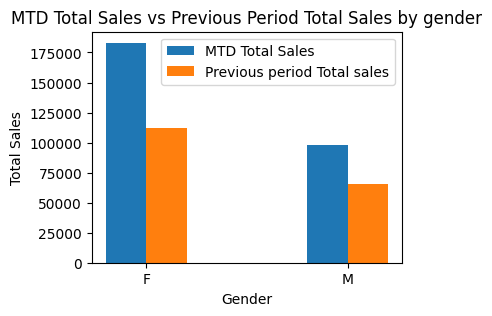

In [ ]:
plot_comparison_bar_chart(df_comp_gender, 0.2, 4, 3, 'mtd_total_sales', 'prev_total_sales','MTD Total Sales', 'Previous period Total sales', 'Gender', 'Total Sales', 'MTD Total Sales vs Previous Period Total Sales by gender', 'customer_gender')

In [ ]:
#@title Distribution of total sales by gender
box_plots(mtd_data, "customer_gender", "total_sales_usd", "Gender", "total sales, usd", 'Distribution of total sales by gender')

In [ ]:
#@title Distribution of item prices by gender
box_plots(mtd_data, "customer_gender", "item_price_usd", "Gender", "Price, usd", 'Distribution of item prices by gender')

In [ ]:
#@title Distribution of the quantity of items by gender
box_plots(mtd_data, "customer_gender", "quantity", "Gender", "Quantity", 'Distribution of the quantity of items by gender')

<ipython-input-214-2da913fc1d76>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

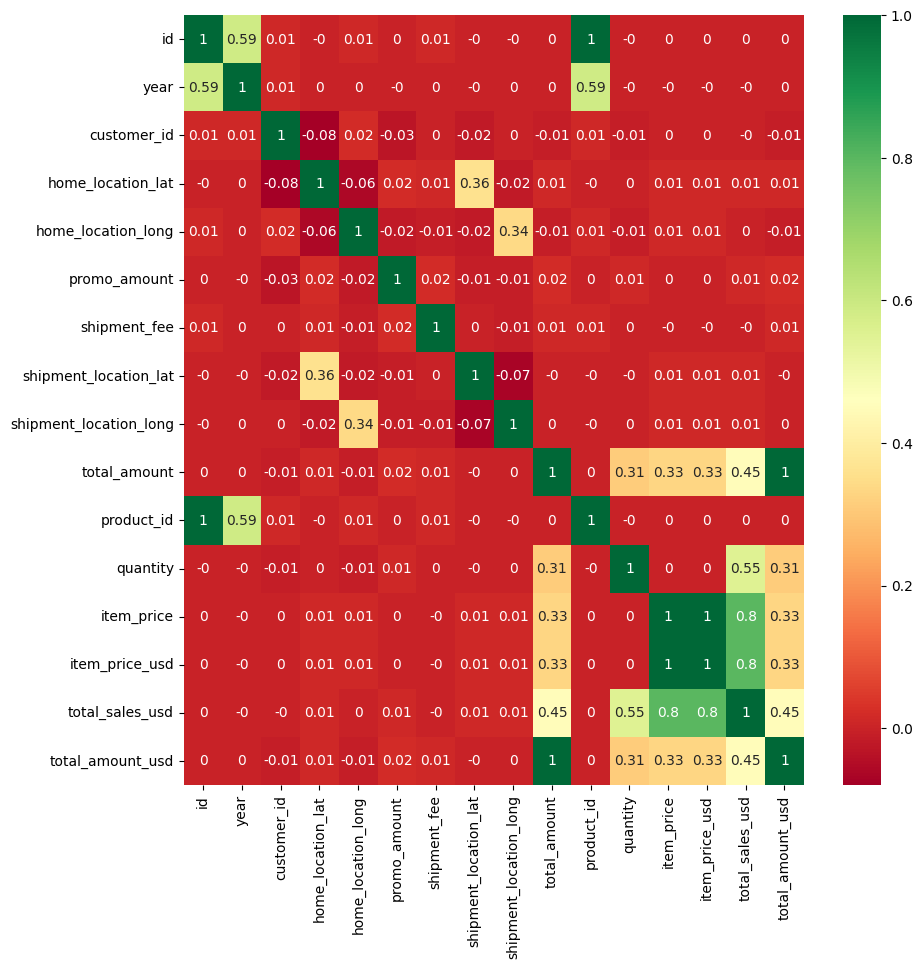

In [ ]:
#@title Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(full_data.corr(method='spearman').round(2),annot=True,cmap='RdYlGn')

## Conclusion
- Total sales increased YTD compared to the previous period +50.92%
- Top 3 categories: Apparel, Accessories, Footwear
- Total Footwear category sales increased YTD compared to the previous period +88.71%
- Total Accessories category sales increased YTD compared to the previous period +67.56%
- Total Apparel category sales increased YTD compared to the previous period +60.52%
- The most popular payment methods are Credit Cards and Gopay YTD
- Credit card sales increased YTD compared to the previous period +58.78%
- Gopay sales increased YTD compared to the previous period +81.48%